In [3]:

from ultralytics import YOLO

In [4]:
# Load my model
best_model = YOLO('/Users/siyunhe/Desktop/CS_Master/year2/CS5330-CV/lab3/detect 2/train/weights/best.pt')

# Count the total number of objects in test dataset

### Coun the number of objects using my model

In [6]:
import os

# Function to run inference on a single image
def run_inference_on_image(image_path, model):
    # Run inference on the image
    results = model(image_path)
    return results

# Function to process results and count objects
def process_results(results):
    object_count = 0
    for result in results:
        # Access bounding boxes
        boxes = result.boxes.xyxy  # Bounding box coordinates (x1, y1, x2, y2)
        object_count += len(boxes)  # Count the number of detected objects
    return object_count

# Path to the test dataset directory
test_dataset_dir = '/Users/siyunhe/Desktop/CS_Master/year2/CS5330-CV/lab3/yolov8_dataset_archive/test'

# Initialize total object count
total_object_count = 0

# Iterate over all images in the test dataset directory
for filename in os.listdir(test_dataset_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Check for image files
        image_path = os.path.join(test_dataset_dir, filename)

        # Run inference on the current image
        new_results = run_inference_on_image(image_path, best_model)

        # Process results and update total object count
        total_object_count += process_results(new_results)

# Print the total number of objects detected in the test dataset
print(f"Total number of objects detected: {total_object_count}")



image 1/1 /Users/siyunhe/Desktop/CS_Master/year2/CS5330-CV/lab3/yolov8_dataset_archive/test/010499e6-e66e-11eb-af36-b0c090bd3910.jpg: 640x640 2 0s, 160.2ms
Speed: 8.3ms preprocess, 160.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /Users/siyunhe/Desktop/CS_Master/year2/CS5330-CV/lab3/yolov8_dataset_archive/test/9d29c4f0-db48-11eb-b27a-3497f683a169.jpg: 640x640 4 0s, 150.2ms
Speed: 1.7ms preprocess, 150.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /Users/siyunhe/Desktop/CS_Master/year2/CS5330-CV/lab3/yolov8_dataset_archive/test/740696d8-e4a4-11eb-b6ac-b0c090bd3910.jpg: 640x640 4 0s, 146.9ms
Speed: 1.6ms preprocess, 146.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /Users/siyunhe/Desktop/CS_Master/year2/CS5330-CV/lab3/yolov8_dataset_archive/test/32ebb814-dacf-11eb-8548-3497f683a169.jpg: 640x640 4 0s, 109.0ms
Speed: 1.5ms preprocess, 109.0ms inference, 0.7ms postprocess per image at sha

### Count the number of objects using annotation files and get the ground truth of the number of objects

In [7]:
import os

# Function to count objects from annotation file
def count_objects_from_annotation(annotation_path):
    object_count = 0
    with open(annotation_path, 'r') as file:
        for line in file:
            if line.strip():  # Check if the line is not empty
                object_count += 1
    return object_count

# Path to the test dataset directory
test_dataset_dir = '/Users/siyunhe/Desktop/CS_Master/year2/CS5330-CV/lab3/yolov8_dataset_archive/test'

# Initialize total object count from annotations
total_object_count_from_annotations = 0

# Iterate over all annotation files in the test dataset directory
for filename in os.listdir(test_dataset_dir):
    if filename.endswith('.txt'):  # Check for annotation files
        annotation_path = os.path.join(test_dataset_dir, filename)

        # Count objects from the current annotation file
        total_object_count_from_annotations += count_objects_from_annotation(annotation_path)

# Print the total number of objects counted from annotation files
print(f"Total number of objects in annotation files: {total_object_count_from_annotations}")

Total number of objects in annotation files: 2103


## Use the model to detect object on a new image


image 1/1 /Users/siyunhe/Desktop/CS_Master/year2/CS5330-CV/cv-lab3/new_image.jpg: 640x640 4 0s, 134.9ms
Speed: 2.4ms preprocess, 134.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


(-0.5, 599.5, 599.5, -0.5)

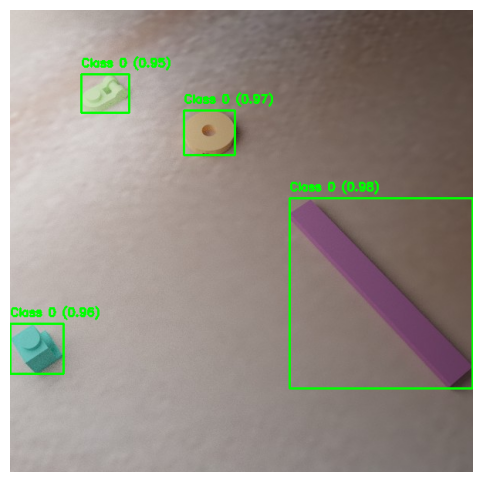

In [8]:
import cv2

# Run inference on a new image that is not part of the test dataset or training dataset. But it is from the large Lego dataset
new_results = best_model("/Users/siyunhe/Desktop/CS_Master/year2/CS5330-CV/cv-lab3/new_image.jpg")

# Iterate over the results to extract bounding boxes and other information
for result in new_results:
    # Read the original image
    image = cv2.imread(result.path)  # Read the image using OpenCV

    # Accessing bounding boxes
    boxes = result.boxes.xyxy  # Bounding box coordinates (x1, y1, x2, y2)
    class_ids = result.boxes.cls  # Class IDs for each detection
    confidences = result.boxes.conf  # Confidence scores for each detection

    # Draw bounding boxes on the image
    for j in range(len(boxes)):
        x1, y1, x2, y2 = map(int, boxes[j])  # Convert to integer coordinates
        class_id = int(class_ids[j])  # Convert to integer class ID
        confidence = confidences[j]  # Get confidence score

        # Define the color and label for the bounding box
        color = (0, 255, 0)  # Green color for bounding box
        label = f"Class {class_id} ({confidence:.2f})"  # Label with class ID and confidence score

        # Draw the bounding box and label on the image
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)  # Draw rectangle
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)  # Draw label


# Use matplotlib to display the image with bounding boxes
import matplotlib.pyplot as plt

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with matplotlib
plt.figure(figsize=(12, 6))
plt.imshow(image_rgb)
plt.axis('off')